# LendingClub Analysis

Main objective of this case study is to analyse data to figure out the average default rates across various independent variables.
The analysis is structured into multiple sections:
1. Data Understanding
2. Data Cleaning
3. Data Analysis

In [91]:
#Lets import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

## Data Understanding
This section invloves examining a familiarising with the data available to gain insights before proceeding with Data analysis.

In [106]:
#Let's check data shape, some sample data and columns
data = pd.read_csv("loan.csv", sep=",", low_memory=False)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [107]:
data.shape

(39717, 111)

In [108]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [109]:
#Data has huge number of columns to analyse. Let's see what are the columns available.
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

Dataset appears to have huge data. It includes both numerical and categorical data types. And also there are some missing values and redundant columns which are not useful for analysis. To further analyse the data, it needs to be cleaned or preprocessed.

## Data Cleaning
This section invlove indenfying, correcting inconsistencies, missing values in dataset to ensure its suitable and reliabile
to analyse data.

In [110]:
#Our dataset is having subtantial number of missing values, let's check missing values in each column
data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [111]:
#let's check percentage of missing values in each column
(data.isnull().sum()/len(data.index))*100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [112]:
#From above result, it's evident that there are columns with 100% missing values which are non contributory for data analysis. 
#So these columns can be removed.
missing_value_columns = data.columns[(data.isnull().sum()/len(data.index))*100 > 90]
data = data.drop(missing_value_columns, axis=1)

In [113]:
#let's check shape of dataset
data.shape

(39717, 55)

In [28]:
#checking for any possibility of removing any other columns
(data.isnull().sum()/len(data.index))*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [114]:
#desc and mths_since_last_delinq have most missing columns from the current dataset
#delinquent(mths_since_last_delinq) is not useful to determine whether loan will be defaulted or not before a person takes a loan
#description(desc) also is just a comment which does not align with the objective of analysis, so both these columns can be removed
data= data.drop(['desc', 'mths_since_last_delinq'], axis=1)

In [32]:
(data.isnull().sum()/len(data.index))*100

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

In [115]:
#In dataset there are Columns that are related to Customer behaviour that are generated after loan is approved can also be removed.
#Also few of employee related variables can also be removed such as zip code, address, title etc
rem_columns =  [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type",
  "title",
  "addr_state",
  "zip_code",
  "url"
]
data = data.drop(rem_columns, axis=1)

In [49]:
#dataset look clean with lesser missing values
#now let's see if there are any inconsistencies in format of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  int32  
 6   int_rate                    38642 non-null  float64
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  int32  
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  386

In [116]:
#there are few columns that can be corrected term, int_rate and emp_length
data['int_rate'] = data['int_rate'].str.rstrip('%').astype(float)

In [117]:
data['term'] = data['term'].str.strip(' months').astype(int)

In [118]:
data = data.dropna(subset=['emp_length'])
data['emp_length'] = data['emp_length'].str.extract('(\d+)').astype(int)

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  int32  
 6   int_rate                    38642 non-null  float64
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  int32  
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  386

Dataset looks much cleaner now, let's start Data Analysis.

## Data Analysis
This section involves examining and interpreting data to derive meaningful insights that helps in decision making.

As the objective is to determine whether person defaults loan or not based on different independent variables, target variable in the dataset is loan_status.

In [120]:
#let's see what exactly does this column comprises off.
data['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

In [121]:
#from the above it is evident that it comprises three distinct statuses (Fully paid, charged off, current(which is neither defaulted not fully paid))
#we can say that current status does not help us in finding out determining whether loan is defaulted or not so let's drop rows with current status.
data = data[data['loan_status'] != 'Current']

#relabelling statuses with 0 and 1, for better visualization and converting the same to interger
data['loan_status'] = data['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)
data['loan_status'] = data['loan_status'].astype(int)

In [122]:
data['loan_status'].value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

### Univariate Analysis
Let's see the distibution of important driver variables that can be strong indicators of default.

In [123]:
data['loan_status'].value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

<AxesSubplot:xlabel='loan_status', ylabel='count'>

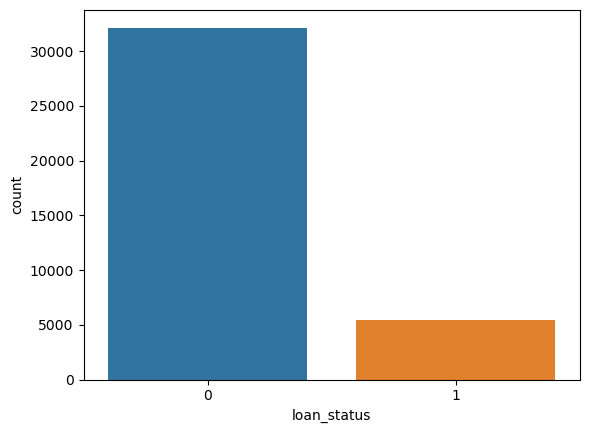

In [58]:
sns.countplot(data['loan_status'])

In [124]:
round((data['loan_status'].value_counts()[1] / len(data['loan_status'])) * 100, 2)

14.38

Overall default rate is 14.38%

In [125]:
#grade
data['grade'].value_counts()

B    11359
A     9660
C     7669
D     4979
E     2620
F      959
G      298
Name: grade, dtype: int64

<AxesSubplot:xlabel='grade', ylabel='count'>

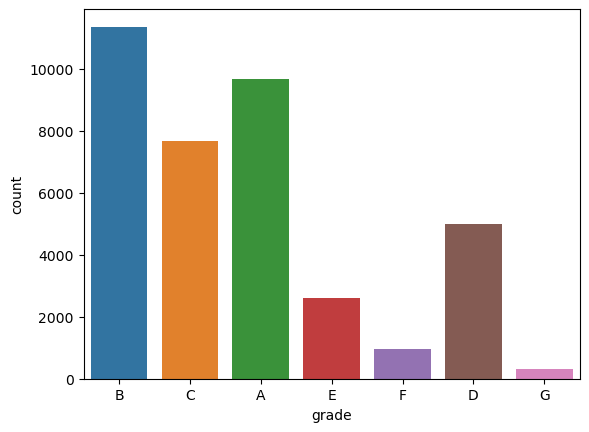

In [126]:
sns.countplot(data['grade'])

In [127]:
#term
data['term'].value_counts()

36    28287
60     9257
Name: term, dtype: int64

<AxesSubplot:xlabel='term', ylabel='count'>

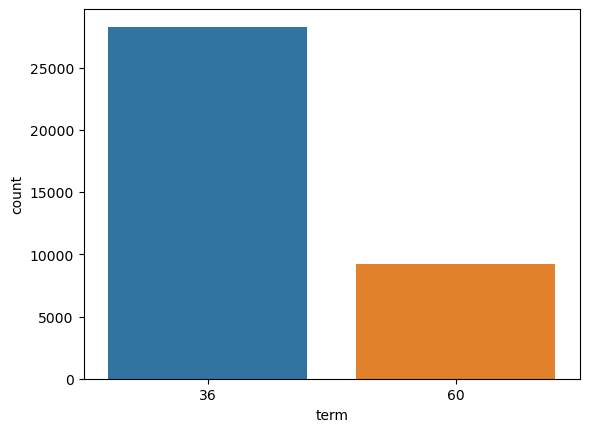

In [68]:
sns.countplot(data['term'])

In [128]:
#loan amount
data['loan_amnt']

0         5000
1         2500
2         2400
3        10000
5         5000
         ...  
39712     2500
39713     8500
39714     5000
39715     5000
39716     7500
Name: loan_amnt, Length: 37544, dtype: int64

<AxesSubplot:xlabel='loan_amnt', ylabel='Density'>

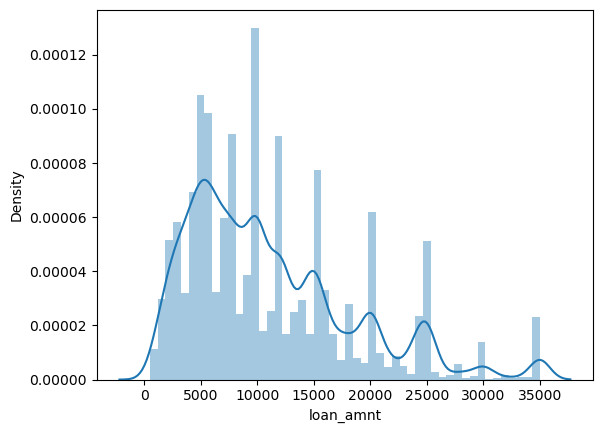

In [129]:
sns.distplot(data['loan_amnt'])

<AxesSubplot:xlabel='int_rate', ylabel='Density'>

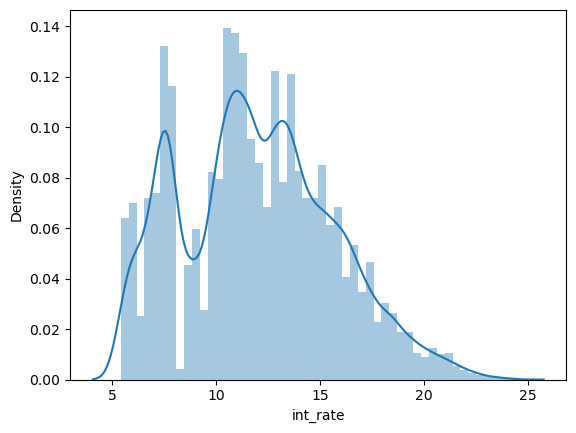

In [73]:
#interest rate
sns.distplot(data['int_rate'])

In [74]:
data['home_ownership'].value_counts()

RENT        18078
MORTGAGE    16595
OWN          2770
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

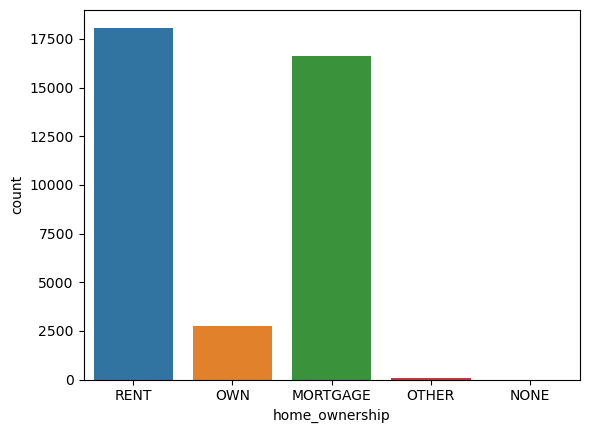

In [75]:
sns.countplot(data['home_ownership'])

### Bivariate Analysis
Let's see the analysis of loan status with different variable to understand relationship and whether they are strong indicators or not.

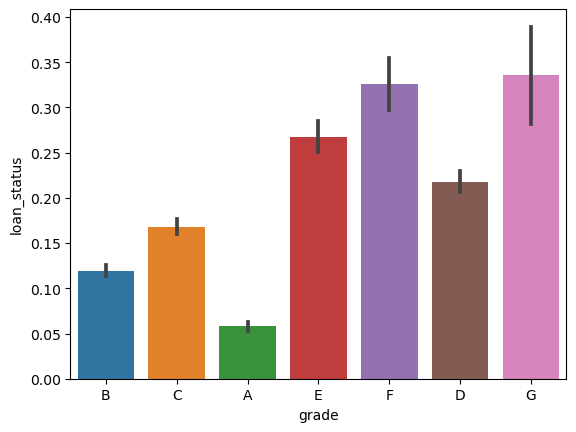

In [77]:
#loan status & grade
sns.barplot(x='grade', y='loan_status', data=data)
plt.show()

From above plot, it is evident that grade is strong indicator as the grade increases form A to G default rate of loan also increases.

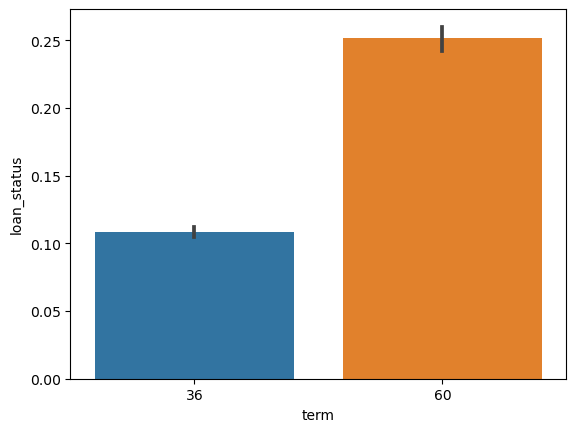

In [78]:
#loan status & term
sns.barplot(x='term', y='loan_status', data=data)
plt.show()

As the term of loan increases default rate increases.

<AxesSubplot:xlabel='loan_status', ylabel='int_rate'>

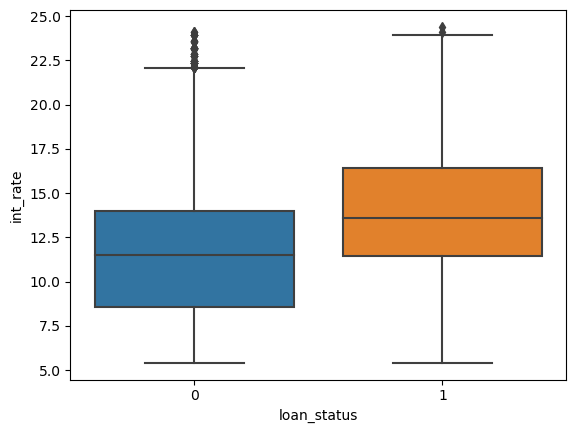

In [79]:
#loan status and int_rate
sns.boxplot(x = 'loan_status', y = 'int_rate' ,data=data)

From the above box plot we can see that mean of interest rates of defaulted loan is higher, we can say that if the interest rate is higher chances of loan being defaultes increases.

<AxesSubplot:xlabel='loan_status', ylabel='annual_inc'>

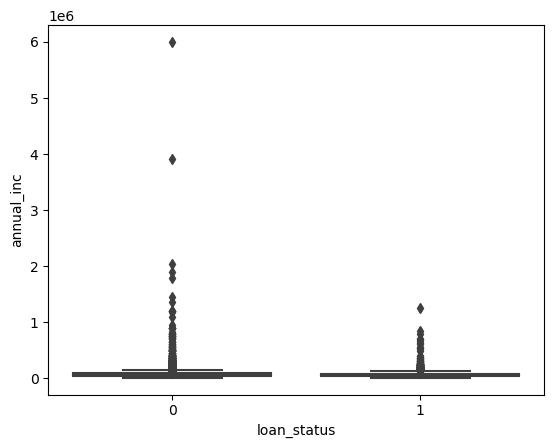

In [80]:
#loan status and annual income
sns.boxplot(x = 'loan_status', y = 'annual_inc' ,data=data)

<AxesSubplot:xlabel='loan_status', ylabel='annual_inc'>

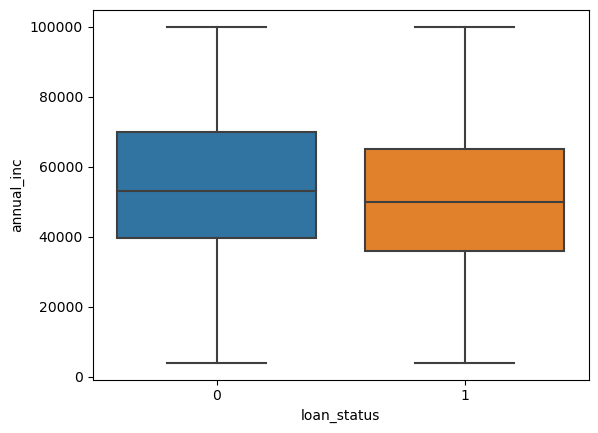

In [83]:
#let's try by removing the outliers as there is no much evidence from above plot
annual_inc = data[data['annual_inc'] < 100000]
sns.boxplot(x = 'loan_status', y = 'annual_inc' ,data=annual_inc)

from above we can say as the annual income of employee is lower chances of loan being default increases

<AxesSubplot:xlabel='home_ownership', ylabel='loan_status'>

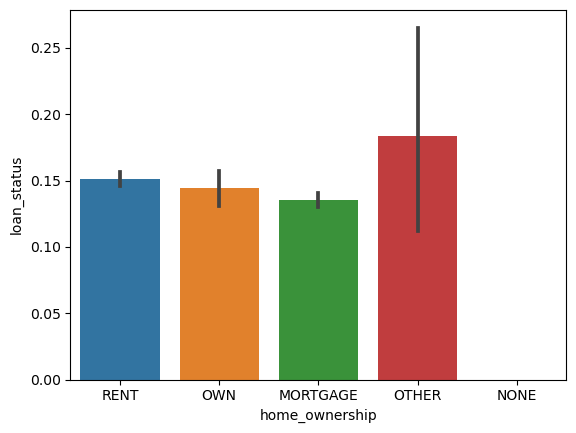

In [87]:
sns.barplot(x='home_ownership', y='loan_status', data=data)

In [84]:
#derived metric
#loan amount and loan status
bins = [0, 5000, 15000, 25000, float('inf')]
labels = ['low', 'medium', 'high', 'very high']

# Apply binning using pd.cut()
data['loan_amnt'] = pd.cut(data['loan_amnt'], bins=bins, labels=labels, include_lowest=True)

In [85]:
data['loan_amnt'].value_counts()

medium       20003
low           9054
high          7075
very high     1412
Name: loan_amnt, dtype: int64

<AxesSubplot:xlabel='loan_amnt', ylabel='loan_status'>

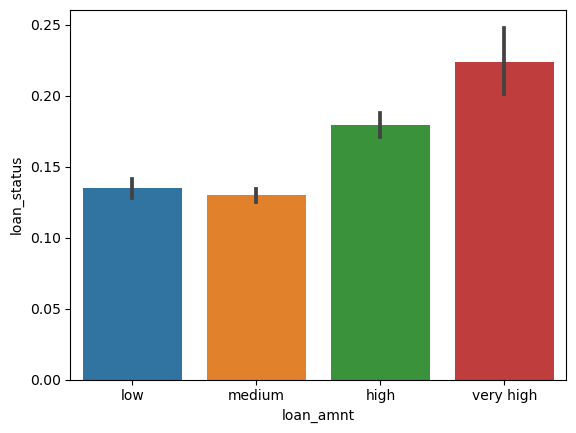

In [86]:
sns.barplot(x='loan_amnt', y='loan_status', data=data)


from above we can assume that if the loan amount is high chances if default increases

In [89]:
# loan status and installment
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
data['installment'] = data['installment'].apply(lambda x: installment(x))

<AxesSubplot:xlabel='installment', ylabel='loan_status'>

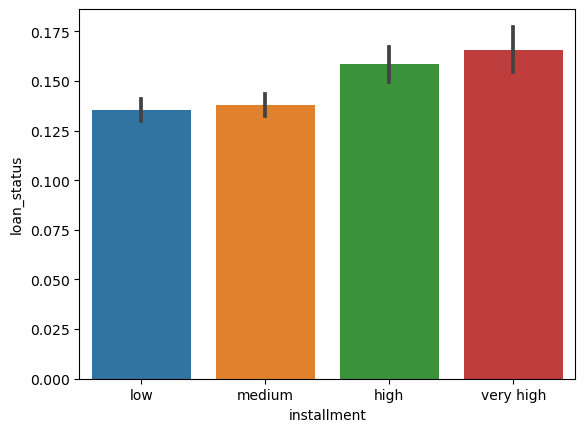

In [90]:
sns.barplot(x='installment', y='loan_status', data=data)

from above it is evident that higher the installment amount higher the default rate 

In [94]:
# year and loan status
#extracting year and month from issued date
data['issue_d'] = data['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))
data['month'] = data['issue_d'].apply(lambda x: x.month)
data['year'] = data['issue_d'].apply(lambda x: x.year)

<AxesSubplot:xlabel='year', ylabel='loan_status'>

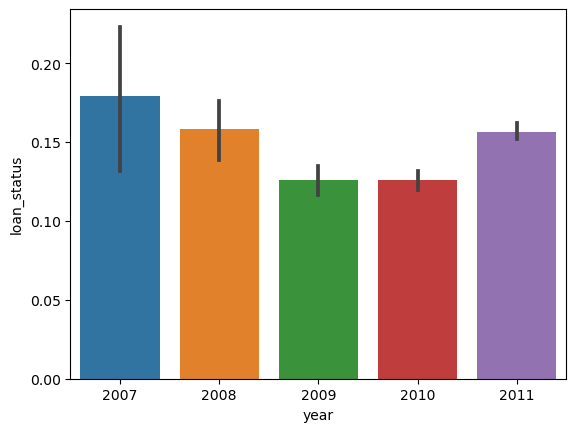

In [95]:
sns.barplot(x='year', y='loan_status', data=data)


from above we can see default lowered every next year until 2011

<AxesSubplot:xlabel='month', ylabel='loan_status'>

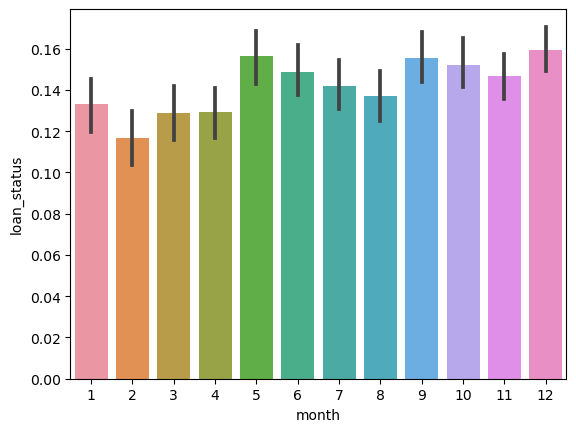

In [96]:
sns.barplot(x='month', y='loan_status', data=data)

from above it can be determined that loans issued in months of May, September, December has higher default rates

<AxesSubplot:xlabel='sub_grade', ylabel='loan_status'>

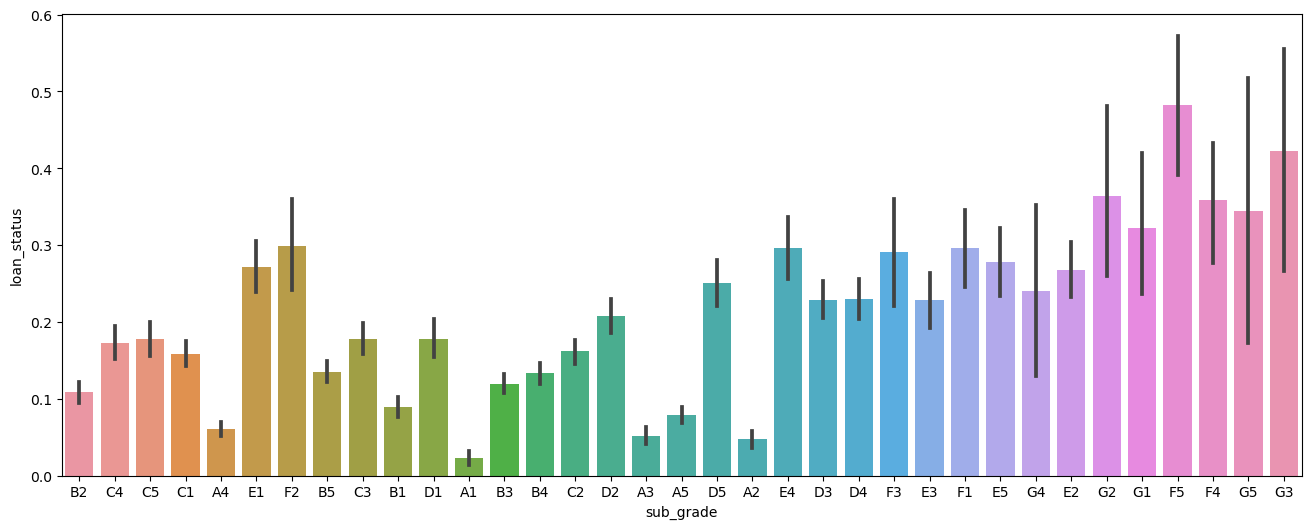

In [98]:
plt.figure(figsize=(16, 6))
sns.barplot(x='sub_grade', y='loan_status', data=data)

<AxesSubplot:xlabel='purpose', ylabel='loan_status'>

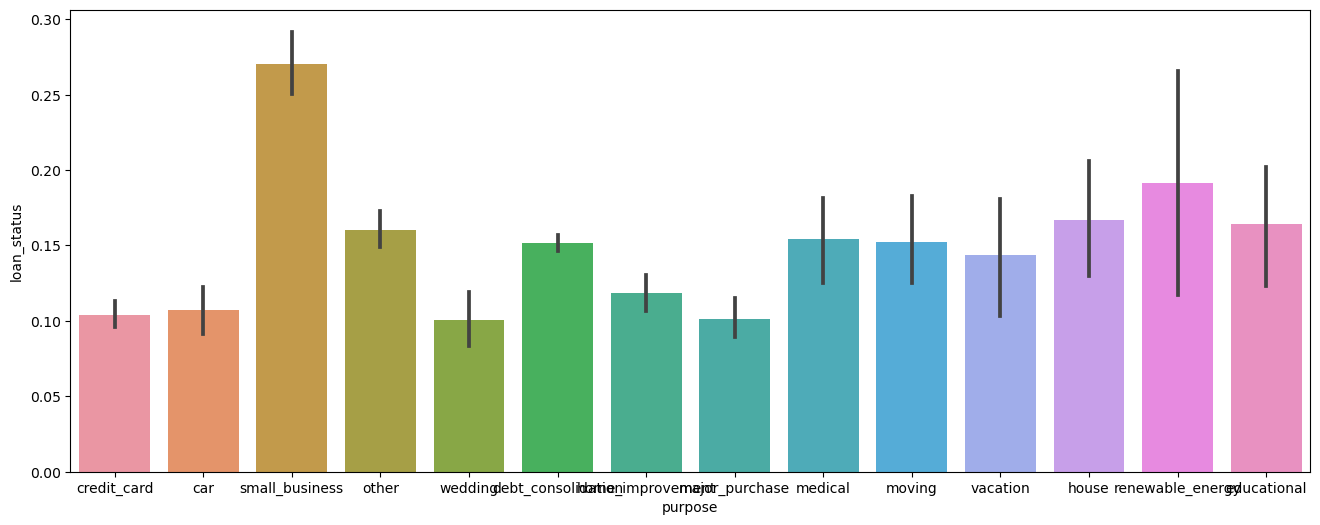

In [100]:
plt.figure(figsize=(16, 6))
sns.barplot(x='purpose', y='loan_status', data=data)

from above we can see loans taken on purpose of small business have higher default rate